# **Entrenamiento y Evaluación de Modelos** 🫀

## Preparación
Los modelos tienen diferentes maneras de limpiar los datos, pero la limpieza oficial es del modelo final (modelo4)

In [16]:
# Librerías
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imutils import paths
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

In [17]:
#Ubicación Dataset
img_paths_train1= list(paths.list_images('../data/raw/train/true'))
img_paths_train0= list(paths.list_images('../data/raw/train/false'))
img_paths_test1= list(paths.list_images('../data/raw/test/true'))
img_paths_test0= list(paths.list_images('../data/raw/test/false'))

In [18]:
#Crear etiquetas
train_imgs = img_paths_train1 + img_paths_train0
train_labels = [1] * len(img_paths_train1) + [0] * len(img_paths_train0)

test_imgs = img_paths_test1 + img_paths_test0
test_labels = [1] * len(img_paths_test1) + [0] * len(img_paths_test0)

In [19]:
#Crear DataFrames
train_df = pd.DataFrame({
    'image_name': train_imgs,
    'label': train_labels
})

test_df = pd.DataFrame({
    'image_name': test_imgs,
    'label': test_labels
})

## Modelos

### 📌 Modelo 1

In [12]:
#Función de carga y limpieza
def limpiar_img1(path):  
    img = cv.imread(path, cv.IMREAD_GRAYSCALE) #poner gris
    img = cv.resize(img, (32,32)) #todas iguales
    img = np.expand_dims(img, axis= -1) # expandir dimensiones para que sea compatible con CNN
    return img


In [13]:
#Preprocesar todas las imgs, dividir Xtrain/Xtest 
X_train1 = np.array([limpiar_img1(img) for img in train_imgs])
y_train1 = np.array(train_labels)

X_test1 = np.array([limpiar_img1(img) for img in test_imgs])
y_test1 = np.array(test_labels)

In [14]:
#Modelo
modelo1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),# reduce dimensionalidad de capa(2,2 o sea a la mitad)
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(), #aplana a una sola dim
    Dense(128, activation='relu'),
    Dropout(0.5), #regularizacion
    Dense(1, activation='sigmoid')
])

#Compilación del modelo
modelo1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
#Entrenamiento del modelo
history1 = modelo1.fit(X_train1, y_train1, epochs=10, validation_data=(X_test1, y_test1))


Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5101 - loss: 8.1851 - val_accuracy: 0.5727 - val_loss: 0.6681
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5680 - loss: 0.6838 - val_accuracy: 0.5925 - val_loss: 0.6579
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5832 - loss: 0.6683 - val_accuracy: 0.5386 - val_loss: 0.6906
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5881 - loss: 0.6627 - val_accuracy: 0.5987 - val_loss: 0.6480
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5859 - loss: 0.6569 - val_accuracy: 0.6194 - val_loss: 0.6246
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6480 - loss: 0.6211 - val_accuracy: 0.6732 - val_loss: 0.6090
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6637 - loss: 0.6052 - val_accuracy: 0.6984 - val_loss: 0.5887
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6927 - loss: 0.5837 - val_accurac

In [17]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score

y_pred_proba1 = modelo1.predict(X_test1)
y_pred1 = (y_pred_proba1 > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias (0 o 1)


accuracy1 = accuracy_score(y_test1, y_pred1)
recall1 = recall_score(y_test1, y_pred1)
auc1 = roc_auc_score(y_test1, y_pred_proba1)  # Calcular AUC-ROC usando probabilidades



print("Accuracy score:", round(accuracy1, 3))
print("Recall score:", round(recall1, 3))
print("AUC-ROC score:", round(auc1, 3))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy score: 0.715
Recall score: 0.747
AUC-ROC score: 0.79


In [ ]:
'''#Exportar Modelo
with open('trained_model1.pkl', 'wb') as file:
    pickle.dump(modelo1, file)'''

### 📌 Modelo 2

In [18]:
def limpiar_img2(img_path):
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)  #grises
    img = cv.resize(img, (32, 32))
    img = img.astype(np.uint8)  #tipo uint8
    img = cv.equalizeHist(img)  #ajuste de contraste
    img = np.expand_dims(img, axis=-1)  #expandir dimensiones para que sea compatible con CNN
    img = img / 255.0  #para que los grises sean de 0 a 1, normalizacion de colores
    return img

In [19]:
X_train2 = np.array([limpiar_img2(img) for img in train_imgs])
y_train2 = np.array(train_labels)

X_test2 = np.array([limpiar_img2(img) for img in test_imgs])
y_test2 = np.array(test_labels)

In [20]:
modelo2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

modelo2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
from tensorflow import keras
from keras.callbacks import  ModelCheckpoint

checkpoint= keras.callbacks.ModelCheckpoint("callback_model.keras")
early_stopping = keras.callbacks.EarlyStopping(patience=10)

history2 = modelo2.fit(X_train2, y_train2, epochs=50, validation_data=(X_test2, y_test2), callbacks = [early_stopping,checkpoint])

Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5326 - loss: 0.6879 - val_accuracy: 0.6544 - val_loss: 0.6074
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6822 - loss: 0.5951 - val_accuracy: 0.7226 - val_loss: 0.5509
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7321 - loss: 0.5426 - val_accuracy: 0.7361 - val_loss: 0.5154
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7643 - loss: 0.4912 - val_accuracy: 0.7496 - val_loss: 0.4994
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7634 - loss: 0.4821 - val_accuracy: 0.7504 - val_loss: 0.5166
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7794 - loss: 0.4590 - val_accuracy: 0.7612 - val_loss: 0.4912
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7963 - loss: 0.4246 - val_accuracy: 0.7711 - val_loss: 0.4813
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8033 - loss: 0.4154 - val_accu

In [22]:
from sklearn.metrics import accuracy_score,recall_score,\
                            roc_auc_score

y_pred_proba2 = modelo2.predict(X_test2)
y_pred2 = (y_pred_proba2 > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias (0 o 1)


accuracy2 = accuracy_score(y_test2, y_pred2)
recall2 = recall_score(y_test2, y_pred2)
auc2 = roc_auc_score(y_test2, y_pred_proba2)  # Calcular AUC-ROC usando probabilidades



print("Accuracy score:", round(accuracy2, 3))
print("Recall score:", round(recall2, 3))
print("AUC-ROC score:", round(auc2, 3))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy score: 0.767
Recall score: 0.79
AUC-ROC score: 0.845


In [23]:
'''#Exportar Modelo

with open('trained_model_2.pkl', 'wb') as file:
    pickle.dump(modelo2, file)'''

"#Exportar Modelo\nimport pickle\n\nwith open('trained_model_2.pkl', 'wb') as file:\n    pickle.dump(modelo2, file)"

### 📌 Modelo 3

In [24]:
# Función para cargar y preprocesar imágenes
def limpiar_img3(img_path):
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    img = cv.resize(img, (32, 32))
    img = img.astype(np.uint8)  
    img = cv.equalizeHist(img)  
    img = np.expand_dims(img, axis=-1)  
    img = img / 255.0 
    return img

In [25]:
X_train3 = np.array([limpiar_img3(img) for img in train_imgs])
y_train3 = np.array(train_labels)

X_test3 = np.array([limpiar_img3(img) for img in test_imgs])
y_test3 = np.array(test_labels)

In [26]:
modelo3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
modelo3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
from tensorflow import keras
from keras.callbacks import  ModelCheckpoint

checkpoint3= keras.callbacks.ModelCheckpoint("callback_model.keras")
early_stopping3 = keras.callbacks.EarlyStopping(patience=10)

In [29]:
datagen = ImageDataGenerator(
    rotation_range=20,      
    width_shift_range=0.1,   
    height_shift_range=0.1,  
    shear_range=0.2,     
    zoom_range=0.2,          
    horizontal_flip=True,    
    fill_mode='nearest'      
)


datagen.fit(X_train3)


history_gen3 = modelo3.fit(datagen.flow(X_train3, y_train3, batch_size=32), epochs=50, validation_data=(X_test3, y_test3),
                           callbacks = [early_stopping3,checkpoint3])


Epoch 1/50
 12/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5660 - loss: 0.6944  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5249 - loss: 0.6932 - val_accuracy: 0.5386 - val_loss: 0.7296
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6009 - loss: 0.6747 - val_accuracy: 0.6158 - val_loss: 0.6364
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6403 - loss: 0.6401 - val_accuracy: 0.6804 - val_loss: 0.5890
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6445 - loss: 0.6323 - val_accuracy: 0.6984 - val_loss: 0.5858
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6526 - loss: 0.6240 - val_accuracy: 0.6930 - val_loss: 0.5769
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6575 - loss: 0.6185 - val_accuracy: 0.7083 - val_loss: 0.5744
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6752 - loss: 0.6088 - val_accuracy: 0.7163 - val_loss: 0.5515
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6612 - loss: 0.6082 - val_accuracy: 0.717

In [30]:
y_pred_proba3 = modelo3.predict(X_test3)
y_pred3 = (y_pred_proba3 > 0.5).astype(int)

# Calcular métricas
accuracy3 = accuracy_score(y_test3, y_pred3)
recall3 = recall_score(y_test3, y_pred3)
auc3 = roc_auc_score(y_test3, y_pred_proba3) 

print("Accuracy:", round(accuracy3, 3))
print("Recall:", round(recall3, 3))
print("AUC-ROC score:", round(auc3, 3))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.76
Recall: 0.835
AUC-ROC score: 0.854


In [31]:
#Exportar Modelo
'''import pickle

with open('trained_model_3.pkl', 'wb') as file:
    pickle.dump(modelo3, file)'''

"import pickle\n\nwith open('trained_model_3.pkl', 'wb') as file:\n    pickle.dump(modelo3, file)"

### 📌 Modelo 4 🥇 

In [20]:
# Función para cargar y preprocesar imágenes
def limpiar_img4(img_path):
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE) 
    img = cv.resize(img, (50, 50))
    img = img.astype(np.uint8)  
    img = cv.equalizeHist(img)  
    img = np.expand_dims(img, axis=-1)  
    img = img / 255.0  
    return img

In [21]:
X_train4 = np.array([limpiar_img4(img) for img in train_imgs])
y_train4 = np.array(train_labels)

X_test4 = np.array([limpiar_img4(img) for img in test_imgs])
y_test4 = np.array(test_labels)

In [22]:
modelo4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    Dropout(0.25),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
modelo4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','recall'])

In [24]:
from tensorflow import keras
from keras.callbacks import  ModelCheckpoint

checkpoint4= keras.callbacks.ModelCheckpoint("callback_model.keras")
early_stopping4 = keras.callbacks.EarlyStopping(patience=10)

In [27]:
datagen = ImageDataGenerator(
    rotation_range=20,       
    width_shift_range=0.1,   
    height_shift_range=0.1,  
    shear_range=0.2,         
    zoom_range=0.2,          
    horizontal_flip=True,    
    fill_mode='nearest'      
)


datagen.fit(X_train4)


history_gen = modelo4.fit(datagen.flow(X_train4, y_train4, batch_size=32), epochs=150, validation_data=(X_test4, y_test4),
                          callbacks = [checkpoint4, early_stopping4])

Epoch 1/150
  5/139 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7027 - loss: 0.5459 - recall: 0.6567

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.7417 - loss: 0.5167 - recall: 0.7803 - val_accuracy: 0.7361 - val_loss: 0.5156 - val_recall: 0.6589
Epoch 2/150
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7295 - loss: 0.5263 - recall: 0.7924 - val_accuracy: 0.7478 - val_loss: 0.4933 - val_recall: 0.8133
Epoch 3/150
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7392 - loss: 0.5131 - recall: 0.8101 - val_accuracy: 0.7603 - val_loss: 0.4787 - val_recall: 0.8582
Epoch 4/150
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7522 - loss: 0.5108 - recall: 0.8034 - val_accuracy: 0.7675 - val_loss: 0.4897 - val_recall: 0.8115
Epoch 5/150
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7410 - loss: 0.5162 - recall: 0.8055 - val_accuracy: 0.7738 - val_loss: 0.4854 - val_recall: 0.8187
Epoch 6/150
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.7557 - loss: 0.5014 - recall: 0.8081 - val_accuracy: 0.7594 - val_loss: 0.4801 - val_recall: 0.7720
Epoc

In [63]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score, precision_score

y_pred_proba4 = modelo4.predict(X_test4)
y_pred4 = (y_pred_proba4 > 0.5).astype(int)  


accuracy4 = accuracy_score(y_test4, y_pred4)
recall4 = recall_score(y_test4, y_pred4)
precision4 = precision_score(y_test4, y_pred4)
auc4 = roc_auc_score(y_test4, y_pred_proba4)  



print("Accuracy score:", round(accuracy4, 2))
print("Recall score:", round(recall4, 3))
print('Precision:', round(precision4,3))
print("AUC-ROC score:", round(auc4, 3))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy score: 0.78
Recall score: 0.777
Precision: 0.787
AUC-ROC score: 0.865


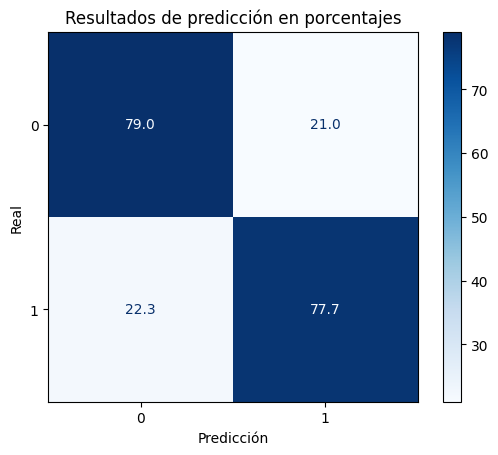

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test4, y_pred4)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent)
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  
plt.title('Resultados de predicción en porcentajes')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

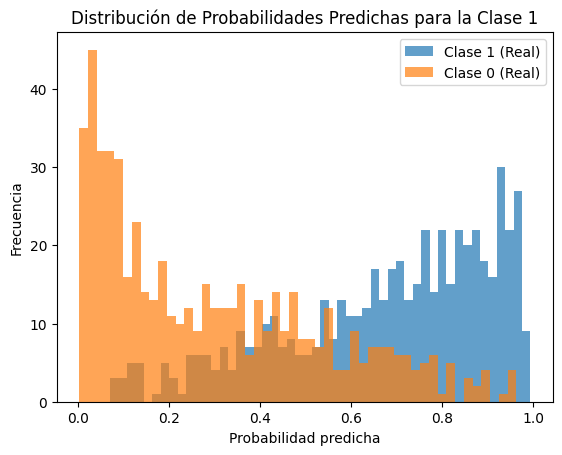

In [41]:
proba_class_1 = y_pred_proba4

plt.hist(proba_class_1[y_test4 == 1], bins=50, alpha=0.7, label='Clase 1 (Real)')
plt.hist(proba_class_1[y_test4 == 0], bins=50, alpha=0.7, label='Clase 0 (Real)')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.title('Distribución de Probabilidades Predichas para la Clase 1')
plt.show()

In [25]:
#Exportar Modelo
'''import pickle

with open('trained_model_4.pkl', 'wb') as file:
    pickle.dump(modelo4, file)'''

### 📌 Modelo 5

In [ ]:
# Función para cargar y preprocesar imágenes
def limpiar_img5(img_path):
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE) 
    img = cv.resize(img, (60, 60))
    img = img.astype(np.uint8)  
    img = cv.equalizeHist(img)  
    img = np.expand_dims(img, axis=-1)  
    img = img / 255.0  
    return img

In [ ]:
X_train5 = np.array([limpiar_img5(img) for img in train_imgs])
y_train5 = np.array(train_labels)

X_test5 = np.array([limpiar_img5(img) for img in test_imgs])
y_test5 = np.array(test_labels)

In [ ]:
modelo5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(60, 60, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelo5.compile(optimizer = Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', 'Recall'])

In [ ]:
from tensorflow import keras
from keras.callbacks import  ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint5= keras.callbacks.ModelCheckpoint("callback_model.keras")
early_stopping5 = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr5 = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.00001)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,       
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.2,         
    zoom_range=0.2,          
    horizontal_flip=True,   
    fill_mode='nearest'      
)


datagen.fit(X_train5)


history_gen = modelo5.fit(datagen.flow(X_train5, y_train5, batch_size=32), epochs=50, validation_data=(X_test5, y_test5),
                          callbacks=[checkpoint5, early_stopping5, reduce_lr5])

Epoch 1/50
  1/139 ━━━━━━━━━━━━━━━━━━━━ 2:31 1s/step - Recall: 0.0667 - accuracy: 0.4688 - loss: 1.2845

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - Recall: 0.5822 - accuracy: 0.5551 - loss: 0.9335 - val_Recall: 0.7038 - val_accuracy: 0.6275 - val_loss: 0.6557 - learning_rate: 0.0010
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - Recall: 0.7333 - accuracy: 0.6093 - loss: 0.6546 - val_Recall: 0.7451 - val_accuracy: 0.5655 - val_loss: 0.8587 - learning_rate: 0.0010
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - Recall: 0.7214 - accuracy: 0.6251 - loss: 0.6425 - val_Recall: 0.7558 - val_accuracy: 0.6706 - val_loss: 0.6224 - learning_rate: 0.0010
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - Recall: 0.6652 - accuracy: 0.6368 - loss: 0.6328 - val_Recall: 0.6715 - val_accuracy: 0.6697 - val_loss: 0.5935 - learning_rate: 0.0010
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - Recall: 0.7613 - accuracy: 0.6576 - loss: 0.6107 - val_Recall: 0.9210 - val_accuracy: 0.6706 - val_loss: 0.5881 - learning_rate: 0.0010
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step 

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,\
                            roc_auc_score

y_pred_proba5 = modelo5.predict(X_test5)
y_pred5 = (y_pred_proba5 > 0.5).astype(int)  


accuracy5 = accuracy_score(y_test5, y_pred5)
recall5 = recall_score(y_test5, y_pred5)
auc5 = roc_auc_score(y_test5, y_pred_proba5)



print("Accuracy score:", round(accuracy5, 3))
print("Recall score:", round(recall5, 3))
print("AUC-ROC score:", round(auc5, 3))

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Accuracy score: 0.755
Recall score: 0.772
AUC-ROC score: 0.841


In [ ]:
#Exportar Modelo
'''import pickle

with open('trained_model_5.pkl', 'wb') as file:
    pickle.dump(modelo5, file)'''

"import pickle\n\nwith open('trained_model_5.pkl', 'wb') as file:\n    pickle.dump(modelo5, file)"

### 📌 Modelo 6 (No Supervisado)

In [8]:
#Definir X
X = np.array([limpiar_img4(img) for img in train_imgs])

#Transformar
n_samples_train, width_train, height_train, channels_train = X.shape
X_reshape = X.reshape(n_samples_train, width_train * height_train * channels_train)

In [9]:
modelo6 = KMeans(n_clusters=2, n_init=10, random_state=11)
modelo6.fit(X_reshape)
y_pred6 = modelo6.fit_predict(X_reshape)

In [12]:
silhouette_score(X_reshape, y_pred6)

0.07840143353923112

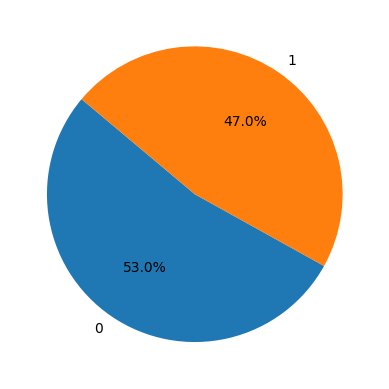

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_counts = pd.Series(y_pred6).value_counts()

plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140);

In [14]:
'''import pickle
with open('trained_model_6.pkl', 'wb') as file:
    pickle.dump(modelo6, file)'''

### 📌 Modelo 7 

In [6]:
X_train7 = np.array([limpiar_img4(img) for img in train_imgs])
y_train7 = np.array(train_labels)

X_test7 = np.array([limpiar_img4(img) for img in test_imgs])
y_test7 = np.array(test_labels)

In [7]:
modelo7 = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
modelo7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
from tensorflow import keras
from keras.callbacks import  ModelCheckpoint

checkpoint7= keras.callbacks.ModelCheckpoint("callback_model.keras")
early_stopping7 = keras.callbacks.EarlyStopping(patience=10)

In [14]:
datagen = ImageDataGenerator(
    rotation_range=20,       # Rango de rotación aleatoria
    width_shift_range=0.1,   # Rango de desplazamiento horizontal
    height_shift_range=0.1,  # Rango de desplazamiento vertical
    shear_range=0.2,         # Rango de cizallamiento
    zoom_range=0.2,          # Rango de zoom aleatorio
    horizontal_flip=True,    # Volteo horizontal aleatorio
    fill_mode='nearest'      # Estrategia de relleno
)


datagen.fit(X_train7)


history_gen7 = modelo7.fit(datagen.flow(X_train7, y_train7, batch_size=32), epochs=70, validation_data=(X_test7, y_test7))

Epoch 1/70
  1/139 ━━━━━━━━━━━━━━━━━━━━ 32s 234ms/step - accuracy: 0.7500 - loss: 0.5524

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


139/139 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.7373 - loss: 0.5067 - val_accuracy: 0.7496 - val_loss: 0.4945
Epoch 2/70
139/139 ━━━━━━━━━━━━━━━━━━━━ 22s 154ms/step - accuracy: 0.7382 - loss: 0.5073 - val_accuracy: 0.7406 - val_loss: 0.4949
Epoch 3/70
139/139 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 0.7545 - loss: 0.5030 - val_accuracy: 0.7540 - val_loss: 0.4930
Epoch 4/70
139/139 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.7515 - loss: 0.5053 - val_accuracy: 0.7504 - val_loss: 0.4976
Epoch 5/70
139/139 ━━━━━━━━━━━━━━━━━━━━ 19s 139ms/step - accuracy: 0.7417 - loss: 0.5126 - val_accuracy: 0.7621 - val_loss: 0.4927
Epoch 6/70
139/139 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - accuracy: 0.7587 - loss: 0.5045 - val_accuracy: 0.7522 - val_loss: 0.4949
Epoch 7/70
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.7452 - loss: 0.5080 - val_accuracy: 0.7567 - val_loss: 0.4918
Epoch 8/70
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.7504 - loss: 0.5050 - val_a

In [15]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score

y_pred_proba7 = modelo7.predict(X_test7)
y_pred7 = (y_pred_proba7 > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias (0 o 1)


accuracy7 = accuracy_score(y_test7, y_pred7)
recall7 = recall_score(y_test7, y_pred7)
auc7 = roc_auc_score(y_test7, y_pred_proba7)  # Calcular AUC-ROC usando probabilidades



print("Accuracy score:", round(accuracy7, 3)) #??????
print("Recall score:", round(recall7, 3))
print("AUC-ROC score:", round(auc7, 3))

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
Accuracy score: 0.755
Recall score: 0.847
AUC-ROC score: 0.857


In [12]:
'''#Exportar Modelo
import pickle

with open('trained_model_7.pkl', 'wb') as file:
    pickle.dump(modelo4, file)'''

"#Exportar Modelo\nimport pickle\n\nwith open('final_model.pkl', 'wb') as file:\n    pickle.dump(modelo4, file)"